# <center> Tarea semanal 5</center>
### <center> Autores: Arturo Huber, Matias Galperin</center>

## Introducción Teórica

En este trabajo abordaremos el tema de la estimación espectral para señales reales. Para ello, estimaremos la densidad espectral de potencia (PSD), con el objetivo de calcular el ancho de banda efectivo de las señales y analizar cómo se distribuye su energía en el dominio de la frecuencia.

La estimación espectral es una herramienta fundamental en el análisis de señales, ya que permite describir cómo se distribuye la potencia o energía de una señal en el dominio de la frecuencia. En el caso de señales reales o aleatorias, donde no se dispone de una expresión determinista del espectro, se recurre a métodos de estimación que aproximan la densidad espectral de potencia (PSD) a partir de un conjunto finito de muestras. Estas estimaciones permiten caracterizar el contenido frecuencial de la señal y calcular parámetros relevantes, como el ancho de banda efectivo o la concentración de energía en determinadas bandas.

Uno de los métodos más utilizados para la estimación espectral es el método de Welch. Este procedimiento se basa en dividir la señal original en varios segmentos parcialmente superpuestos, aplicar una ventana a cada segmento y luego calcular el periodograma de cada uno de ellos. Posteriormente, los periodogramas individuales se promedian para obtener una estimación final de la densidad espectral de potencia. El uso del solapamiento entre segmentos permite aprovechar mejor las muestras disponibles, mientras que el ventaneado reduce los efectos de fuga espectral (leakage) producidos por la truncamiento temporal. En conjunto, estos pasos logran una estimación más estable y representativa del espectro de la señal.

Otro metodo para estimar la PSD es el periodograma ventaneado que consiste en calcular el espectro de una señal luego de aplicarle una ventana, parecido al metodo de Welch, pero no incorpora el uso de los promedios, por lo que la varianza suele ser alta. También se puede utilizar el metodo de Blackman-Tuckey que estima primero la autocorrelación truncada de la señal y luego le aplica una ventana antes de obtener el espectro. Esto permite controlar directamente el ancho de banda y lograr un equilibrio entre resolución y reducción de leakage, aunque la estimación suele ser más suave pero de resolución moderada, y requiere elegir cuidadosamente el tamaño del truncamiento.

Entre las principales ventajas del método de Welch se destaca su capacidad para reducir la varianza de la estimación espectral. Al promediar múltiples periodogramas, el resultado es menos sensible a fluctuaciones aleatorias y presenta un espectro más suave, lo cual mejora la interpretabilidad y la estabilidad de la estimación. Además, se pueden ajustar los parámetros —como el tamaño de los segmentos, el tipo de ventana y el grado de solapamiento— para adaptarse a diferentes condiciones de análisis.

No obstante, el método de Welch introduce un compromiso fundamental entre varianza y resolución espectral. Reducir la varianza mediante el uso de segmentos más cortos o un mayor solapamiento implica una menor resolución en frecuencia, ya que cada segmento cubre un intervalo temporal más reducido. Por el contrario, aumentar la longitud de los segmentos mejora la resolución pero incrementa la varianza del estimador. En este sentido, el método resulta especialmente versátil, ya que ofrece la posibilidad de controlar estos parámetros para encontrar un equilibrio adecuado entre resolución y estabilidad según las características de la señal y los objetivos del análisis.


## Análisis y Desarrollo


Para el desarrollo de este trabajo, importamos tres señales reales, un electrocardiograma (ECG), una pletismografía (PPG) y una señal de audio. Usamos el metodo de Welch para estimar su densidad espectral de potencia y calculamos su ancho de banda con un 95% de la energia.

Por la versatilidad que ofrece el método de Welch, lo elegimos para utilizarlo en las diferentes señales, usamos diferentes parametros de la cantidad de promedios, ventanas y zero padding para obtener un espectro suave, con baja varianza y buena resolución espectral, graficamos las estimaciones de las densidades de potencia y presentamos los resultados obtenidos de los anchos de banda obtenidos en una tabla.

In [4]:
import numpy as np
from scipy import signal as sig
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
   
import scipy.io as sio
from scipy.io.wavfile import write

from lectura_sigs import ecg_one_lead, fs_ecg, ppg, fs_ppg, fs_audio, wav_data

columnas = ["Nombre_Señal", "Frecuencia_Min_Hz", "Frecuencia_Max_Hz", "Ancho_Banda_Hz"]
tabla_resultados = pd.DataFrame(columns=columnas)

frecuencia baja: 0.00, frecuencia alta 22.77
ancho de banda 22.77


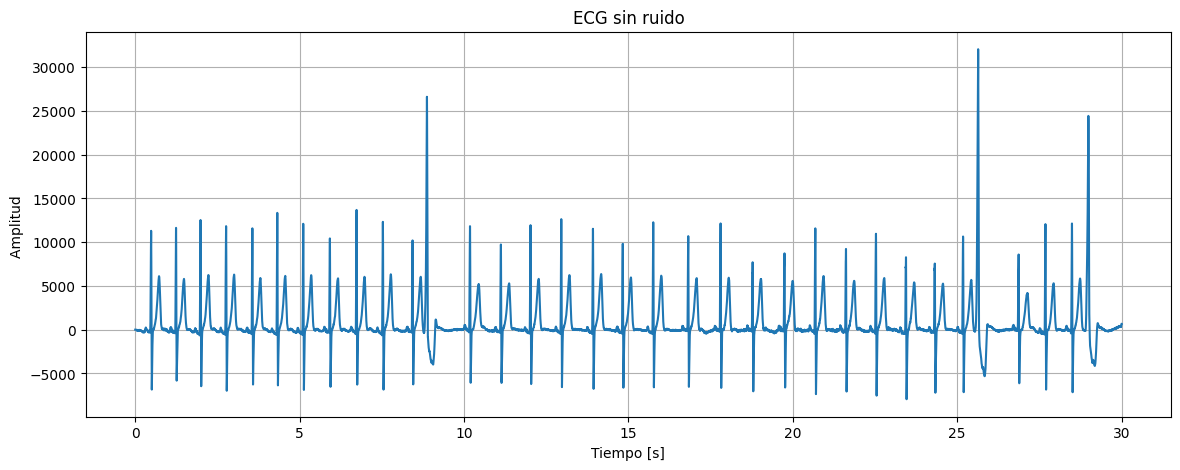

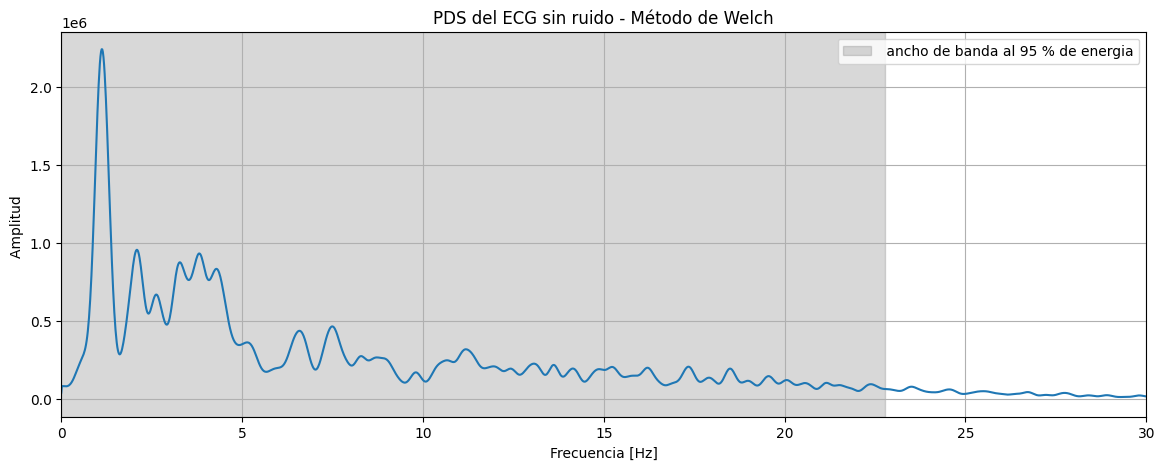

In [10]:
N = len(ecg_one_lead)
t = np.arange(N) / fs_ecg 

cantidad_promedios = 7
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ecg_one_lead, fs=fs_ecg, nperseg = nperseg, window = 'hann', nfft = 2 * N)

total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
#low = (1 - percentil) / 2
low = 0
#high = 1 - low
high =  percentil

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

tabla_resultados.loc[len(tabla_resultados)] = ["ECG", f"{bandWith[0]:.2f}",f"{bandWith[-1]:.2f}", f"{bandWith[-1]-bandWith[0]:.2f}"]

# Graficar

plt.figure(figsize=(14,5))
plt.plot(t, ecg_one_lead)
plt.title("ECG sin ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud ")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)
plt.title("PDS del ECG sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud ")
plt.xlim(0,30)
#plt.ylim(0,50)
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(14,5))
plt.plot(ppg)
plt.grid(True)

N = len(ppg)
cantidad_promedios = 10
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ecg_one_lead, fs=fs_ppg, nperseg = nperseg, window = 'hann', nfft = 3 * N)

total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
#low = (1 - percentil) / 2
#high = 1 - low
low = 0
high = percentil

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

tabla_resultados.loc[len(tabla_resultados)] = ["PPG", f"{bandWith[0]:.2f}",f"{bandWith[-1]:.2f}", f"{bandWith[-1]-bandWith[0]:.2f}"]

# Graficar
ymin, ymax = plt.ylim()   # límites actuales del eje y

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)   
plt.xlim(0,15)
plt.title("PSD de PPG sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(wav_data)
plt.grid(True)

N = len(wav_data)
cantidad_promedios = 15
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ecg_one_lead, fs=fs_audio, nperseg = nperseg, window = 'flattop', nfft = 5 * N)

total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
low = (1 - percentil) / 2
high = 1 - low

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

tabla_resultados.loc[len(tabla_resultados)] = ["AUDIO", f"{bandWith[0]:.2f}",f"{bandWith[-1]:.2f}", f"{bandWith[-1]-bandWith[0]:.2f}"]

# Graficar
ymin, ymax = plt.ylim()   

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)   
plt.xlim(0,1700)
plt.title("PSD del audio sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones

In [ ]:
display(tabla_resultados)

Viendo las estimaciones de densidad espectral de potencia y los resultados de los anchos de banda, pueden observarse ciertas características distintivas de las señales estudiadas. Las primeras dos corresponden a señales médicas asociadas a procesos fisiológicos complejos, por lo que resulta coherente que el orden de magnitud de sus frecuencias sea de apenas unos pocos hertz. En ambas se observa un pico de energía en torno a 1–2 Hz, atribuible al ritmo cardíaco.

En el caso del audio, el ancho de banda se encuentra naturalmente dentro del rango audible (20 Hz–20 kHz), con una alta concentración de energía en las frecuencias bajas, aproximadamente hasta 200 Hz, coherente con el rango fundamental de la voz humana.

El método de Welch demostró ser una herramienta eficaz para la estimación espectral de distintas señales reales. La posibilidad de ajustar parámetros como la longitud de los segmentos, el solapamiento y la ventana permitió lograr estimaciones suaves, con baja varianza, sin perder información relevante del contenido espectral.

Uno de los aspectos centrales del análisis fue la observación del compromiso entre resolución en frecuencia y varianza de la estimación. La elección de los parámetros del método —como la cantidad de promedios, el zero padding y el tipo de ventana— influye directamente en este balance. Un mayor número de promedios o ventanas más selectivas reducen el leakage y suavizan el espectro, aunque a costa de menor resolución en frecuencia. Por el contrario, un número reducido de promedios o ventanas más amplias permiten distinguir mejor los picos espectrales, pero con mayor varianza. Este equilibrio resulta fundamental al aplicar el método de Welch, dependiendo de si se prioriza la estabilidad de la estimación o la resolución de componentes cercanas.

Finalmente, los anchos de banda efectivos obtenidos evidencian las diferencias espectrales propias de cada señal analizada. En el caso del ECG, la energía se concentra principalmente en bajas frecuencias (del orden de algunas decenas de hertz), mientras que en la señal PPG el contenido espectral es aún más estrecho. En contraste, la señal de audio presenta una distribución mucho más extendida, con energía significativa hasta frecuencias del orden de los kilohertz. Estos resultados reflejan las particularidades fisiológicas o físicas de cada tipo de señal y validan la capacidad del método de Welch para adaptarse a distintos dominios espectrales.